In [8]:
a = input("Enter A in Bin: ")
b = input("Enter B in Bin: ")

Enter A in Bin: 100
Enter B in Bin: 001


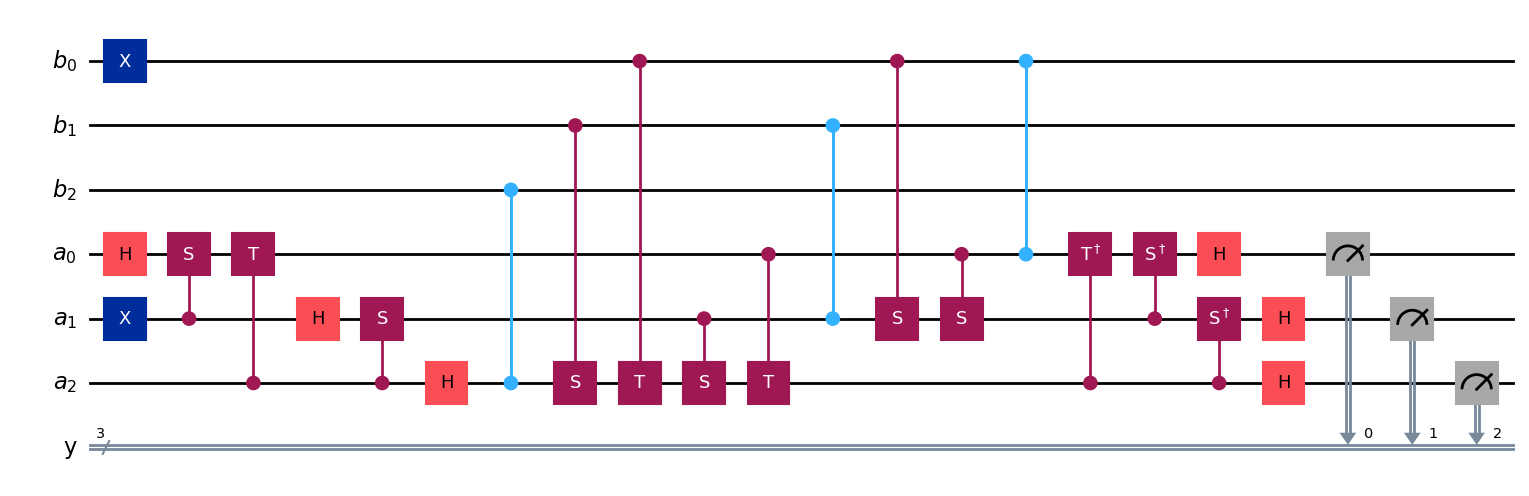

In [12]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, qasm
from qiskit.circuit.library.standard_gates import XGate, HGate, SGate, TGate, ZGate, TdgGate, SdgGate
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import math
qa = QuantumRegister(3,name= "a")
qb = QuantumRegister(3,name= "b")
y = ClassicalRegister(3, name='y')
qc = QuantumCircuit(qb,qa,y)

#print(a[2])
if(int(a[2]) == 1):
    qc.append(XGate(),[qa[0]])
if(int(a[1]) == 1):
    qc.append(XGate(),[qa[1]])
if(int(a[0]) == 1):
    qc.append(XGate(),[qa[2]])

if(int(b[2]) == 1):
    qc.append(XGate(),[qb[0]])
if(int(b[1]) == 1):
    qc.append(XGate(),[qb[1]])
if(int(b[0]) == 1):
    qc.append(XGate(),[qb[2]])

    
Controlled_Z_Gate = ZGate().control(1)
Controlled_S_Gate = SGate().control(1)
Controlled_T_Gate = TGate().control(1)
Controlled_Tdg_Gate = TdgGate().control(1)
Controlled_Sdg_Gate = SdgGate().control(1)

#QFT
#qc.swap(qa[2],qa[0])
#y[0]
qc.append(HGate(),[qa[0]])
qc.append(Controlled_S_Gate, [qa[1],qa[0]])
qc.append(Controlled_T_Gate, [qa[2],qa[0]])

#y[1]
qc.append(HGate(),[qa[1]])
qc.append(Controlled_S_Gate, [qa[2],qa[1]])

#y[2]
qc.append(HGate(),[qa[2]])


#addition
#a2
qc.append(Controlled_Z_Gate,[qb[2],qa[2]])
qc.append(Controlled_S_Gate,[qb[1],qa[2]])
qc.append(Controlled_T_Gate,[qb[0],qa[2]])
qc.append(Controlled_S_Gate,[qa[1],qa[2]])
qc.append(Controlled_T_Gate,[qa[0],qa[2]])

qc.append(Controlled_Z_Gate,[qb[1],qa[1]])
qc.append(Controlled_S_Gate,[qb[0],qa[1]])
qc.append(Controlled_S_Gate,[qa[0],qa[1]])

qc.append(Controlled_Z_Gate,[qb[0],qa[0]])

#qc.swap(qa[2],qa[0])
#y[0]
qc.append(Controlled_Tdg_Gate, [qa[2], qa[0]])  # Apply inverse T gate
qc.append(Controlled_Sdg_Gate, [qa[1], qa[0]])  
qc.append(HGate(), [qa[0]])  # Apply Hadamard on qa[0]

qc.append(Controlled_Sdg_Gate, [qa[2], qa[1]])  
qc.append(HGate(), [qa[1]])  

qc.append(HGate(), [qa[2]])  # Apply Hadamard on qa[2]

# Swap the qubits to reverse the order
#qc.swap(qa[0], qa[2])

qc.measure(qa[0], y[0])  
qc.measure(qa[1], y[1])
qc.measure(qa[2], y[2])

display(qc.draw('mpl'))

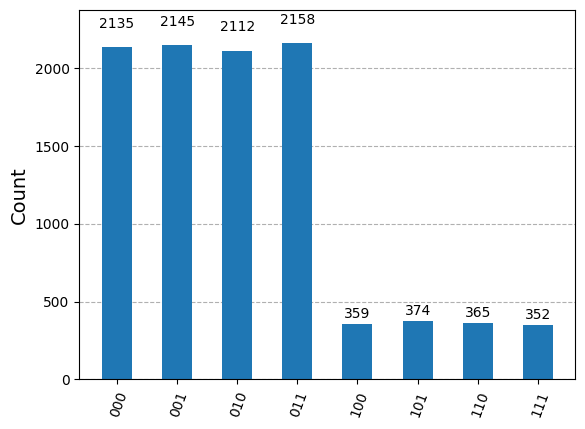

None

In [13]:
#print("a[2:0]\na_0 = a[0]\na_1 = a[1]\na_2 = a[2]")
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=10000).result()
counts = result.get_counts()
display(plot_histogram(counts))
display(plt.show())

In [39]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, qasm
from qiskit.circuit.library.standard_gates import XGate, HGate, SGate, TGate, ZGate, TdgGate, SdgGate
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import math


def QFT_Adder(a,b):
    qa = QuantumRegister(3,name= "x")
    qb = QuantumRegister(3,name= "b")
    y = ClassicalRegister(3, name='y')
    qc = QuantumCircuit(qb,qa,y)

#print(a[2])

    if b[0] == "1":
        qc.append(XGate(), [qb[0]])
    if b[1] == "1":
        qc.append(XGate(), [qb[1]])
    if b[2] == "1":
        qc.append(XGate(), [qb[2]])

    if a[2] == "1":
        qc.append(XGate(), [qa[2]])
    if a[0] == "1":
        qc.append(XGate(), [qa[0]])
    if a[1] == "1":
        qc.append(XGate(), [qa[1]])

    
    Controlled_Z_Gate = ZGate().control(1)
    Controlled_S_Gate = SGate().control(1)
    Controlled_T_Gate = TGate().control(1)
    Controlled_Tdg_Gate = TdgGate().control(1)
    Controlled_Sdg_Gate = SdgGate().control(1)

#y[0]
    qc.append(HGate(),[qa[2]])
    qc.append(Controlled_S_Gate, [qa[1],qa[2]])
    qc.append(Controlled_T_Gate, [qa[0],qa[2]])

#y[1]
    qc.append(HGate(),[qa[1]])
    qc.append(Controlled_S_Gate, [qa[0],qa[1]])

#y[2]
    qc.append(HGate(),[qa[0]])
    #swapping y0 and y2

#addition
    qc.append(Controlled_Z_Gate,[qb[2],qa[2]])
    qc.append(Controlled_S_Gate,[qb[1],qa[2]])
    #qc.append(Controlled_S_Gate,[qa[1],qa[2]])
    qc.append(Controlled_T_Gate,[qb[0],qa[2]])
    #qc.append(Controlled_T_Gate,[qa[1],qa[2]])


    qc.append(Controlled_Z_Gate,[qb[1],qa[1]])
    qc.append(Controlled_S_Gate,[qb[0],qa[1]])
    #qc.append(Controlled_S_Gate,[qa[0],qa[1]])

    qc.append(Controlled_Z_Gate,[qb[0],qa[0]])

#IQFT
#y[0]
    qc.append(Controlled_Sdg_Gate, [qa[1],qa[2]])
    qc.append(Controlled_Tdg_Gate, [qa[0],qa[2]])
    qc.append(HGate(),[qa[2]])

#y[1]
    qc.append(Controlled_Sdg_Gate, [qa[0],qa[1]])
    qc.append(HGate(),[qa[1]])

#y[2]
    qc.append(HGate(),[qa[0]])

    qc.swap(qa[2],qa[0])

    qc.measure(qa[0], y[0])  
    qc.measure(qa[1], y[1])
    qc.measure(qa[2], y[2])

    display(qc.draw('mpl'))

    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=50000).result()
    counts = result.get_counts()
    return counts

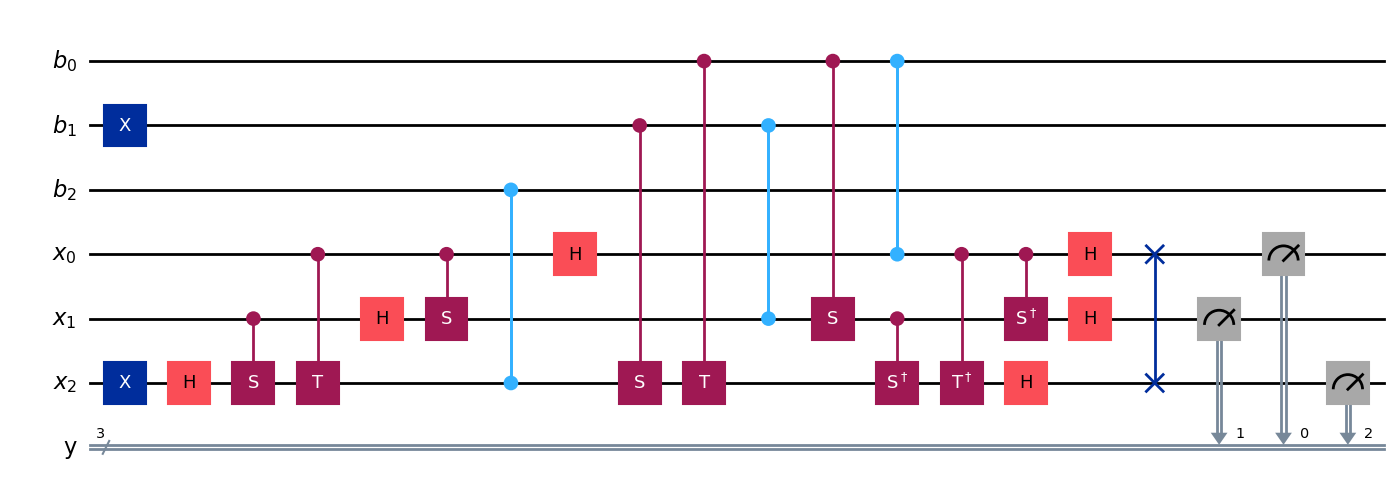

{'101': 10657, '001': 10741, '111': 6175, '011': 12518, '010': 6199, '000': 1968, '100': 1742}


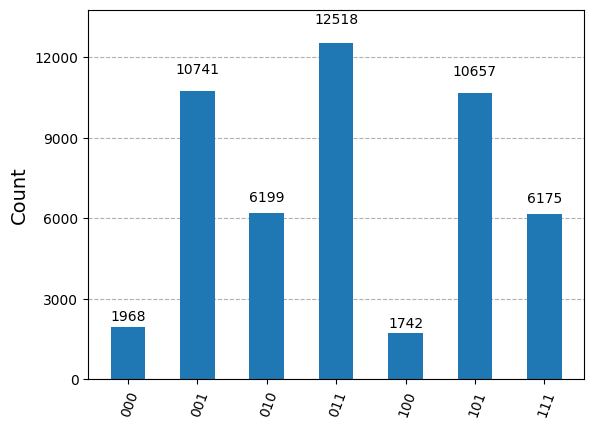

None

001 + 010 = 011


In [40]:
a = "001"
b = "010"
counts = QFT_Adder(a,b)
print(counts)
display(plot_histogram(counts))
display(plt.show())
largest_value = 0
for key, value in counts.items():
    if value > largest_value:
        largest_value = value
        largest_key = key
print(a,"+",b,"=",largest_key)